In [1]:
import pandas as pd
df = pd.read_csv("hr_data.csv")
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [2]:
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [3]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_") # Clean column names

In [4]:
print(df.isnull().sum()) #missing values

age                         0
attrition                   0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssince

In [5]:
df.drop_duplicates(inplace=True) # Remove duplicates

In [6]:
df['attrition_flag'] = df['attrition'].apply(lambda x: 1 if str(x).strip().lower() == "yes" else 0) # feature enginnering

In [7]:
def service_bucket(x):
    if x < 3: return "0-2 yrs"
    elif x < 6: return "3-5 yrs"
    elif x < 11: return "6-10 yrs"
    else: return "10+ yrs"
df['service_bucket'] = df['yearsatcompany'].apply(service_bucket)

In [8]:
def income_bucket(x):
    if x < 3000: return "Low"
    elif x < 7000: return "Medium"
    else: return "High"
df['income_bucket'] = df['monthlyincome'].apply(income_bucket)

In [9]:
print(df.describe())

               age    dailyrate  distancefromhome    education  employeecount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       employeenumber  environmentsatisfaction   hourlyrate  jobinvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-3530706479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='attrition', palette='Set2')


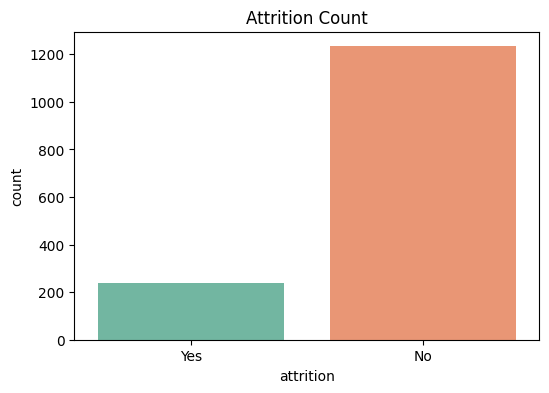

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='attrition', palette='Set2')
plt.title("Attrition Count")
plt.show()

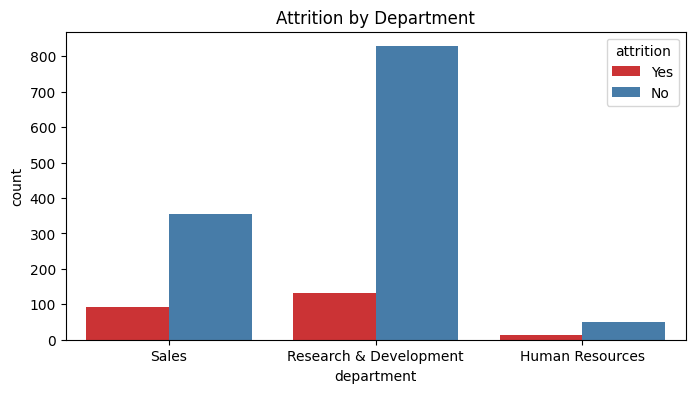

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='department', hue='attrition', palette='Set1')
plt.title("Attrition by Department")
plt.show()

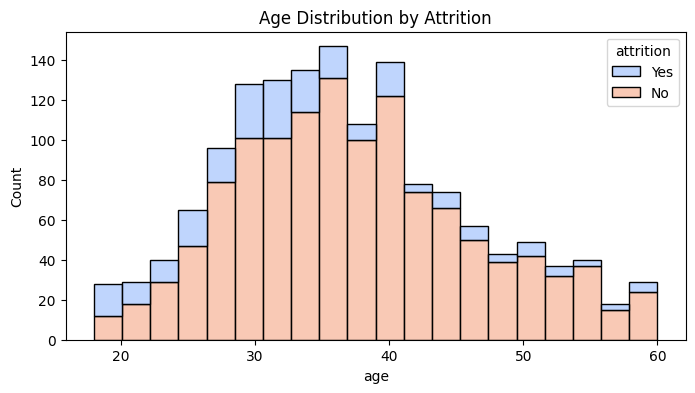

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='age', hue='attrition', multiple="stack", palette='coolwarm', bins=20)
plt.title("Age Distribution by Attrition")
plt.show()

/tmp/ipython-input-4053551217.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='monthlyincome', palette='muted')


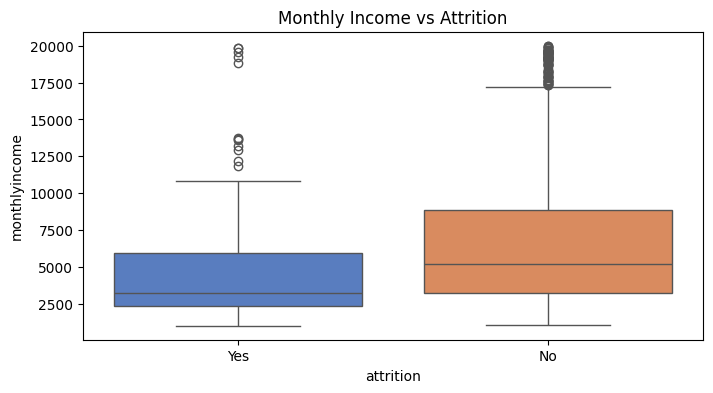

In [14]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='attrition', y='monthlyincome', palette='muted')
plt.title("Monthly Income vs Attrition")
plt.show()

In [15]:
headcount = df.shape[0]
total_attrition = df['attrition_flag'].sum()
attrition_rate = round((total_attrition / headcount) * 100, 2)
avg_age = round(df['age'].mean(), 1)
avg_income = round(df['monthlyincome'].mean(), 2)
avg_tenure = round(df['yearsatcompany'].mean(), 1)

gender_counts = df['gender'].value_counts()
gender_ratio = f"{gender_counts.get('Male',0)} : {gender_counts.get('Female',0)}"

print(" OVERALL KPIs")
print(f"Headcount: {headcount}")
print(f"Total Attrition: {total_attrition}")
print(f"Attrition Rate: {attrition_rate}%")
print(f"Average Age: {avg_age}")
print(f"Average Monthly Income: {avg_income}")
print(f"Average Tenure (yrs): {avg_tenure}")
print(f"Gender Ratio (M:F): {gender_ratio}")

 OVERALL KPIs
Headcount: 1470
Total Attrition: 237
Attrition Rate: 16.12%
Average Age: 36.9
Average Monthly Income: 6502.93
Average Tenure (yrs): 7.0
Gender Ratio (M:F): 882 : 588


In [16]:
dept_summary = df.groupby('department').agg(
    headcount=('employeenumber', 'count'),
    attrition_count=('attrition_flag', 'sum'),
    avg_income=('monthlyincome', 'mean'))

dept_summary['attrition_rate_%'] = round((dept_summary['attrition_count'] / dept_summary['headcount']) * 100, 2)
dept_summary['avg_income'] = dept_summary['avg_income'].round(2)
print("\n Department-wise Summary:\n", dept_summary)


 Department-wise Summary:
                         headcount  attrition_count  avg_income  \
department                                                       
Human Resources                63               12     6654.51   
Research & Development        961              133     6281.25   
Sales                         446               92     6959.17   

                        attrition_rate_%  
department                                
Human Resources                    19.05  
Research & Development             13.84  
Sales                              20.63  


In [17]:
service_summary = df['service_bucket'].value_counts().reset_index()
service_summary.columns = ['service_bucket', 'count']
print("\n Service Bucket Distribution:\n", service_summary)


 Service Bucket Distribution:
   service_bucket  count
0       6-10 yrs    448
1        3-5 yrs    434
2        0-2 yrs    342
3        10+ yrs    246


In [18]:
income_summary = df['income_bucket'].value_counts().reset_index()
income_summary.columns = ['income_bucket', 'count']
print("\n Income Bucket Distribution:\n", income_summary)


 Income Bucket Distribution:
   income_bucket  count
0        Medium    640
1          High    435
2           Low    395


In [19]:
dept_summary.to_csv("dept_kpis.csv")
service_summary.to_csv("service_bucket_summary.csv")
income_summary.to_csv("income_bucket_summary.csv")

print("\n KPI summary files saved: 'dept_kpis.csv', 'service_bucket_summary.csv', 'income_bucket_summary.csv'")


 KPI summary files saved: 'dept_kpis.csv', 'service_bucket_summary.csv', 'income_bucket_summary.csv'
